# **Part A**

In [121]:
# Import Python Libraries
import numpy as np
import matplotlib.pyplot as plt
# Set A: Input Pattern
#sample 1
x1 = np.array([[-1, -1, -1, 1, -1, -1, -1],
     [-1, -1, -1, 1, -1, -1, -1],
     [-1, -1, -1, 1, -1, -1, -1],
     [-1, -1, 1, -1, 1, -1, -1],
     [-1, -1, 1, -1, 1, -1, -1],
     [-1, 1, 1, 1, 1, 1, -1],
     [-1, 1, -1, -1, -1, 1, -1],
     [-1, 1, -1, -1, -1, 1, -1],
     [1, 1, 1, -1, 1, 1, 1]])

x1 = x1.reshape(63,1)
#sample 2
x2 = np.array([[1, 1, 1, 1, 1, 1, 1],
     [1, -1, -1, -1, -1, -1, 1],
     [1, -1, -1, -1, -1, 1, -1],
     [1, -1, -1, -1, 1, -1, -1],
     [1, 1, 1, 1, -1, -1, -1],
     [1, -1, -1, -1, 1, -1, -1],
     [1, -1, -1, -1, -1, 1, -1],
     [1, -1, -1, -1, -1, -1, 1],
     [1, 1, 1, 1, 1, 1, 1]])

x2 = x2.reshape(63,1)
#sample 3
x3 = np.array([[-1,-1, 1, 1, 1, 1, -1],
     [-1, 1, -1, -1, -1, -1, 1],
     [1, -1, -1, -1, -1, -1, -1],
     [1, -1, -1, -1, -1, -1, -1],
     [1, -1, -1, -1, -1, -1, -1],
     [1, -1, -1, -1, -1, -1, -1],
     [1, -1, -1, -1, -1, -1, -1],
     [-1, 1, -1, -1, -1, -1, 1],
     [-1, -1, 1, 1, 1, 1, -1]])

x3 = x3.reshape(63,1)
# Set B: Target Pattern
# output 1
y1=np.array([[-1,1,-1],
             [1,-1,1],
             [1,1,1],
             [1,-1,1],
             [1,-1,1]])
y1=y1.reshape(15,1)
#output2
y2=np.array([[1,1,-1],
             [1,-1,1],
             [1,1,-1],
             [1,-1,1],
             [1,1,-1]])
y2=y2.reshape(15,1)
#output 3
y3=np.array([[-1,1,1],
             [1,-1,-1],
             [1,-1,-1],
             [1,-1,-1],
             [-1,1,1]])
y3=y3.reshape(15,1)

In [122]:
inputSet = np.hstack((x1,x2,x3))
targetSet = np.hstack((y1,y2,y3))
weight = inputSet @ targetSet.T
weight.shape

(63, 15)

In [123]:
def activation(vec,W):
  new_vec=vec.copy()
  new_vec=new_vec.reshape(1,63)
  res=new_vec @ W
  res[res>0]=1
  res[res<=0]=-1
  return res

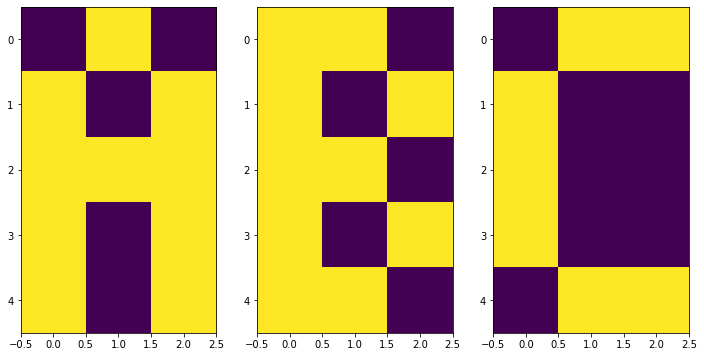

In [124]:
fig,ax=plt.subplots(1,3,figsize=(12,6))
for i,row in enumerate(inputSet.T):
  ax[i].imshow(activation(row,weight).reshape(5,3))

# **Part B**

In [125]:
def creat_new_output(given_out):
  new_out=np.zeros((3,given_out.shape[1]))
  weight = inputSet @ given_out
  for i,row in enumerate(inputSet.T):
    new_out[i,:]=activation(row,weight).reshape(1,given_out.shape[1])
  return new_out

In [162]:
list(itertools.product([-1, 1], repeat=2))

[(-1, -1), (-1, 1), (1, -1), (1, 1)]

In [163]:
list(itertools.combinations(list(itertools.product([-1, 1], repeat=2)), 3))

[((-1, -1), (-1, 1), (1, -1)),
 ((-1, -1), (-1, 1), (1, 1)),
 ((-1, -1), (1, -1), (1, 1)),
 ((-1, 1), (1, -1), (1, 1))]

In [127]:
import itertools
def creat_output(num_square):
  lst = list(itertools.product([-1, 1], repeat=num_square))
  states=np.array(list(itertools.combinations(lst, 3)))
  out=np.zeros((3*len(states),num_square))
  for i,item in enumerate(states):
    out[3*i:3*(i+1),:]=np.array(item)
  return out


In [128]:
def check_min_size(low,high):
  find_min=False
  for i in range(low,high+1):
    all_state=creat_output(i)
    if find_min==False:
      for rows in [all_state[3*index:3*(index+1),:] for index in range(int(all_state.shape[0]/3))]:
        if np.sum((creat_new_output(rows)==rows).astype('int'))==(3*rows.shape[1]):
          print(f"The minimal size is {i}")
          find_min=True
          return rows
          break
    else:
      break
    print(f"checking size {i}")

In [129]:
Min_out_size=check_min_size(2,14).T
Min_out_size

The minimal size is 2


array([[-1., -1.,  1.],
       [-1.,  1., -1.]])

In [130]:
y1_minimal=Min_out_size[:,0]
print(f"First Minimal output is:\n{y1_minimal}\n")
y2_minimal=Min_out_size[:,1]
print(f"second Minimal output is:\n{y2_minimal}\n")
y3_minimal=Min_out_size[:,2]
print(f"Third Minimal output is:\n{y3_minimal}")

First Minimal output is:
[-1. -1.]

second Minimal output is:
[-1.  1.]

Third Minimal output is:
[ 1. -1.]


# **Part C(Adding noise => 10%)**

## First Output(**Originall one**)

In [131]:
import random
def Test_adding_noise(output,noise_rate):
  Acc=np.zeros((100,3))
  W = inputSet @ output.T
  for i in range(100):
    Res=np.zeros((output.shape[0],3))
    new_set=inputSet.copy()
    random_list=random.sample(range(0,inputSet.shape[0]),int(inputSet.shape[0]*noise_rate/100))
    for j,row in enumerate(new_set.T):
      row[random_list]=-row[random_list]
      Res[:,j]=activation(row,W)#.reshape(output.shape[0],1)
    Acc[i,:]=np.round(np.sum((Res==output).astype('int'),axis=0)/output.shape[0]*100,2)
  tot_acc=np.mean(Acc,axis=1)
  return Acc,tot_acc


In [132]:
Acc,Tot_Acc=Test_adding_noise(targetSet,10)

In [133]:
Tot_Acc

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [134]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 100 times 100% totall accuracy


## Second Output(**Minimal_size**)

In [135]:
Acc,Tot_Acc=Test_adding_noise(Min_out_size,10)

In [136]:
Tot_Acc

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [137]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 100 times 100% totall accuracy


# **Part C(Adding noise => 40%)**

## First Output(**Originall one**)

In [138]:
Acc,Tot_Acc=Test_adding_noise(targetSet,40)

In [139]:
Tot_Acc

array([100.        , 100.        ,  84.44666667, 100.        ,
        84.44666667,  80.00333333, 100.        ,  88.89      ,
        60.        , 100.        ,  95.55666667,  71.11333333,
       100.        ,  77.78      ,  95.55666667,  60.00333333,
        95.55666667,  84.44666667, 100.        ,  95.55666667,
        44.44666667, 100.        ,  68.89      ,  84.44666667,
        48.89      ,  86.67      ,  86.66666667,  91.11333333,
        88.89      ,  88.89      , 100.        ,  95.55666667,
        80.        , 100.        ,  95.55666667,  80.00333333,
        88.89      ,  95.55666667, 100.        ,  77.78      ,
        57.78      ,  88.89      , 100.        , 100.        ,
        77.78      , 100.        ,  71.11333333,  88.89      ,
        88.89      ,  95.55666667,  95.55666667,  80.        ,
       100.        ,  88.89      ,  88.89      ,  86.67      ,
        77.78      ,  80.00333333,  73.33333333,  95.55666667,
       100.        , 100.        ,  68.88666667,  91.11

In [140]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 30 times 100% totall accuracy


we have 30 times 100% totall accuracy


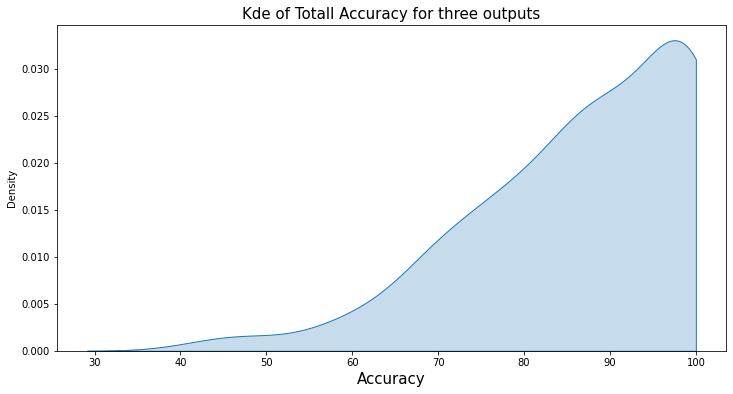

In [141]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(Tot_Acc,shade=True,clip=[0,100])
plt.title("Kde of Totall Accuracy for three outputs",size=15)
plt.xlabel('Accuracy',size=15);
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

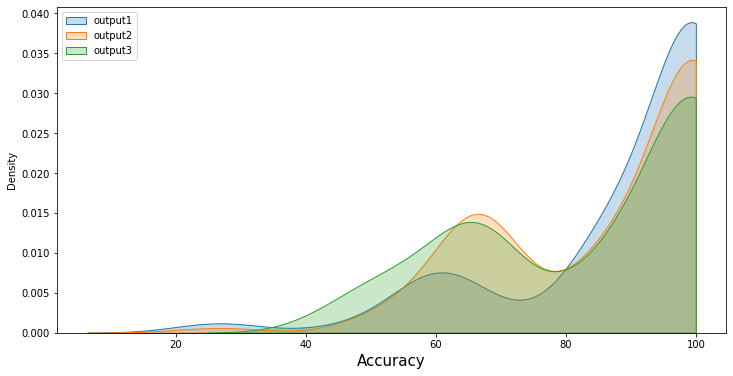

In [142]:
plt.figure(figsize=(12,6))
for i,row in enumerate(Acc.T):
  sns.kdeplot(row,shade=True,clip=[0,100],label=f"output{i+1}");
plt.xlabel('Accuracy',size=15)
plt.legend(loc=2);

## Second Output(**Minimal_size**)

In [143]:
Acc,Tot_Acc=Test_adding_noise(Min_out_size,40)

In [144]:
Tot_Acc

array([100.        ,  83.33333333,  50.        ,  66.66666667,
        83.33333333, 100.        ,  66.66666667,  83.33333333,
       100.        , 100.        ,  50.        ,  83.33333333,
       100.        ,  66.66666667,  33.33333333, 100.        ,
        66.66666667,  66.66666667, 100.        ,  83.33333333,
       100.        ,  66.66666667,  66.66666667,  66.66666667,
        50.        ,  50.        , 100.        , 100.        ,
       100.        ,  83.33333333,  66.66666667,  83.33333333,
        33.33333333, 100.        , 100.        , 100.        ,
       100.        , 100.        ,  83.33333333,  50.        ,
        66.66666667, 100.        , 100.        ,  66.66666667,
       100.        , 100.        ,  83.33333333,  50.        ,
       100.        , 100.        , 100.        ,  66.66666667,
        50.        ,  83.33333333,  66.66666667,  83.33333333,
        83.33333333,  83.33333333,  66.66666667,  66.66666667,
       100.        ,  66.66666667, 100.        ,  83.33

we have 37 times 100% totall accuracy


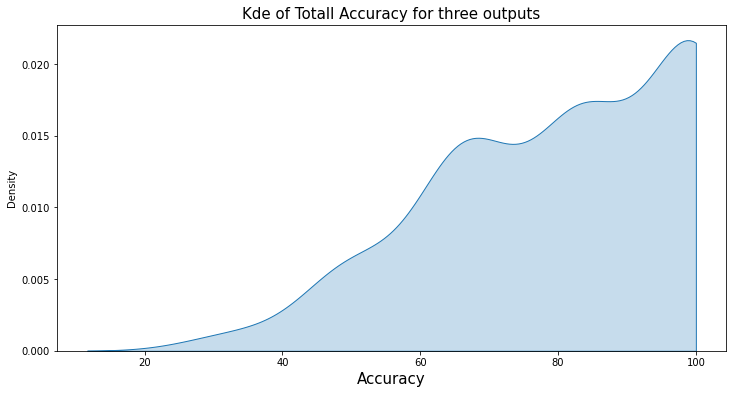

In [145]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.kdeplot(Tot_Acc,shade=True,clip=[0,100])
plt.title("Kde of Totall Accuracy for three outputs",size=15)
plt.xlabel('Accuracy',size=15);
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

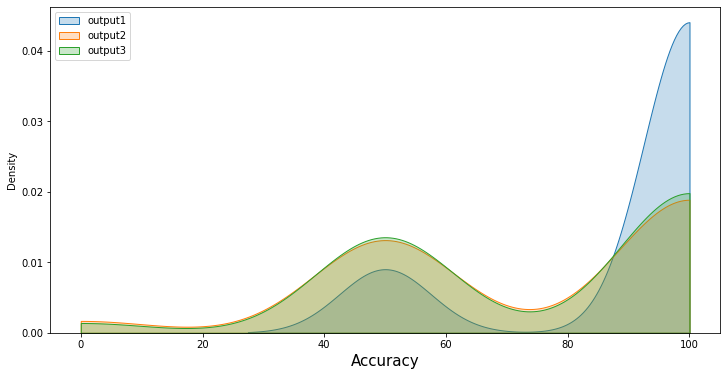

In [146]:
plt.figure(figsize=(12,6))
for i,row in enumerate(Acc.T):
  sns.kdeplot(row,shade=True,clip=[0,100],label=f"output{i+1}");
plt.xlabel('Accuracy',size=15)
plt.legend(loc=2);

# **Part D(Adding Missing value => 10%)**

## First Output(**Originall one**)

In [147]:
def Test_adding_Missing(output,Missing_rate):
  Acc=np.zeros((100,3))
  W = inputSet @ output.T
  for i in range(100):
    Res=np.zeros((output.shape[0],3))
    new_set=inputSet.copy()
    random_list=random.sample(range(0,inputSet.shape[0]),int(inputSet.shape[0]*Missing_rate/100))
    for j,row in enumerate(new_set.T):
      row[random_list]=0
      Res[:,j]=activation(row,W)#.reshape(output.shape[0],1)
    Acc[i,:]=np.round(np.sum((Res==output).astype('int'),axis=0)/output.shape[0]*100,2)
  tot_acc=np.mean(Acc,axis=1)
  return Acc,tot_acc


In [148]:
Acc,Tot_Acc=Test_adding_Missing(targetSet,10)

In [149]:
Tot_Acc

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [150]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 100 times 100% totall accuracy


## Second Output(**Minimal_size**)

In [151]:
Acc,Tot_Acc=Test_adding_Missing(Min_out_size,10)

In [152]:
Tot_Acc

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [153]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 100 times 100% totall accuracy


# **Part D(Adding Missing value => 40%)** 

## First Output(**Originall one**)

In [154]:
Acc,Tot_Acc=Test_adding_Missing(targetSet,40)

In [155]:
Tot_Acc

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [156]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 100 times 100% totall accuracy


## Second Output(**Minimal_size**)

In [157]:
Acc,Tot_Acc=Test_adding_Missing(Min_out_size,40)

In [158]:
Tot_Acc

array([100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100.])

In [159]:
print(f"we have {np.sum((Tot_Acc==100).astype('int'))} times 100% totall accuracy")

we have 100 times 100% totall accuracy
